In [2]:
setwd('C:/Users/qlian/OneDrive/Desktop/Grad Fall 2020 Courses/EAS 506 Statistical Mining I/WEEK6')

## Import Libraries

In [2]:
library(leaps)
library(Metrics)

Warning message:
"package 'leaps' was built under R version 3.6.3"Warning message:
"package 'Metrics' was built under R version 3.6.3"

# Question 1

The insurance company benchmark data set gives information on customers.
Specifically, it contains 86 variables on product-usage data and socio-demographic
data derived from zip area codes. There are 5,822 customers in the training set and
another 4,000 in the test set. The data were collected to answer the following
questions: Can you predict who will be interested in buying a caravan insurance
policy and give an explanation why? Compute the OLS estimates and compare them
with those obtained from the following variable-selection algorithms: Forwards
Selection, Backwards Selection, Lasso regression, and Ridge regression. Support
your answer.


(The data can be downloaded from https://kdd.ics.uci.edu/databases/tic/tic.html. )

## Load dataset and define dependent and independent variables

The training set provided includes the response variable (the 86th variable specifically). Let's go ahead and separate that out!

### Training set

In [3]:
df_train = read.csv("ticdata2000.txt",header=F,na.string="?",sep="\t")

In [4]:
names(df_train)

[1] "V1"  "V2"  "V3"  "V4"  "V5"  "V6"  "V7"  "V8"  "V9"  "V10" "V11" "V12"
[13] "V13" "V14" "V15" "V16" "V17" "V18" "V19" "V20" "V21" "V22" "V23" "V24"
[25] "V25" "V26" "V27" "V28" "V29" "V30" "V31" "V32" "V33" "V34" "V35" "V36"
[37] "V37" "V38" "V39" "V40" "V41" "V42" "V43" "V44" "V45" "V46" "V47" "V48"
[49] "V49" "V50" "V51" "V52" "V53" "V54" "V55" "V56" "V57" "V58" "V59" "V60"
[61] "V61" "V62" "V63" "V64" "V65" "V66" "V67" "V68" "V69" "V70" "V71" "V72"
[73] "V73" "V74" "V75" "V76" "V77" "V78" "V79" "V80" "V81" "V82" "V83" "V84"
[85] "V85" "V86"

In [5]:
dim(df_train)

[1] 5822   86

#### Check for missing values

In [6]:
sum(is.na(df_train))

[1] 0

no missing values, let's proceed!

#### Define the dependent and independent variables for the training set 

In [7]:
X_train_insure = df_train[-c(86)]

In [8]:
y_train_insure = df_train[c(86)]

- we know that this is a binary class problem with class 0 and 1, but let's go ahead and see how many obsevations belong in each class

In [9]:
as.data.frame(table(y_train_insure))

y_train_insure,Freq
0,5474
1,348


In [10]:
round(348/5844*100,2)

[1] 5.95

- in training set, only less than 6% of the car owners bought the caravan insurance. Indicating that this is an imbalanced dataset. This is very important later, in terms of how we would measure the performance of our model. Let's proceed for now.

#### Testing set 

In [11]:
X_test_insure = read.csv("ticeval2000.txt",header=F,na.string="?",sep="\t")

In [12]:
y_test_insure  = read.csv("tictgts2000.txt",header=F,na.string="?",sep="\t")

#### The dependent and indepenent variables are already separated, but let's just create a merged data frame so it's easier to use for some algorithms 

In [13]:
df_test = X_test_insure

In [14]:
df_test['V86'] <- y_test_insure  

#### Check for missing values

In [15]:
sum(is.na(df_test))

[1] 0

## Least Squares

In [16]:
lm_mod_insure <- lm(formula = df_train$V86 ~.,data = df_train)

#### Making prediction

In [17]:
y_pred_insure_train <- predict(lm_mod_insure,X_train_insure)

In [18]:
y_pred_insure_test <- predict(lm_mod_insure,X_test_insure)

In [19]:
head(cbind(data.frame(y_pred_insure_train),y_train_insure))
head(cbind(data.frame(y_pred_insure_test),y_test_insure))

y_pred_insure_train,V86
0.09738541,0
0.01345938,0
0.08354523,0
0.09075754,0
0.04307400,0
0.01475749,0


y_pred_insure_test,V1
0.014441132,0
0.215946829,1
0.099937482,0
0.095439888,0
0.005945841,0
0.027520016,0


#### Tresholding the predicted values into 0 and 1s
- since this is techinically a classfication problem with two classes 0 and 1, and we are applying the least square method, we will get values that are continuous. In order to measure the performance of the least square model, we will threshold the predicted values into 0 and 1 by 0.5. If y_pred_insure(i) is > 0.5, the datapoint will be marked as 1, and 0 otherwise.

In [20]:
## Training
for (i in 1:length(y_pred_insure_train)){
    if (y_pred_insure_train[i] >= 0.5){
        y_pred_insure_train[i] <- 1
    } else{
        y_pred_insure_train[i] <- 0
    }
}

In [21]:
## Testing
for (i in 1:length(y_pred_insure_test)){
    if (y_pred_insure_test[i] >= 0.5){
        y_pred_insure_test[i] <- 1
    } else{
        y_pred_insure_test[i] <- 0
    }
}

In [22]:
head(cbind((y_pred_insure_train),y_train_insure))
head(cbind((y_pred_insure_test),y_test_insure))

(y_pred_insure_train),V86
0,0
0,0
0,0
0,0
0,0
0,0


(y_pred_insure_test),V1
0,0
0,1
0,0
0,0
0,0
0,0


#### Making sure there's no masking of classes

In [23]:
unique(y_pred_insure_train)
unique(y_pred_insure_test)

[1] 0 1

[1] 0 1

There are two classes !

#### Calculate MSE

- First we need to convert the target variables from dataframe to numeric 

In [24]:
y_train_insure = y_train_insure[,1]

In [25]:
y_test_insure = y_test_insure[,1]

In [26]:
MSE_insure_train = mse(y_train_insure,y_pred_insure_train)
cat("MSE for least-square method model: ", MSE_insure_train,"\n")

MSE_insure = mse(y_test_insure,y_pred_insure_test)
cat("MSE for least-square method model: ", MSE_insure)



MSE for least-square method model:  0.05960151 
MSE for least-square method model:  0.05975

- We can see that both training and testing errors are really low, and are quite similar. Let's look at further into this

#### Confusion Matrix

- confusion matrix is a good way to access the performance of a classification problem. Although in this problem, we are solving it as regression problem. Since we are thresholding the data, it'll still be a good idea to take a look at this. 
- It is especially important to look at the confusion matrix since we already know that we have an imbalanced dataset at hand. I will explain this later after I displayed the confusion matrix

In [27]:
library(caret)
library(e1071) 

Warning message:
"package 'caret' was built under R version 3.6.3"Loading required package: lattice
Warning message:
"package 'lattice' was built under R version 3.6.3"Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.6.2"
Attaching package: 'caret'

The following objects are masked from 'package:Metrics':

    precision, recall

Warning message:
"package 'e1071' was built under R version 3.6.3"

In [28]:
CM_insure_train = table(y_pred_insure_train,y_train_insure)
print("Confusion Matrix for Training Set: ")
CM_insure_train

[1] "Confusion Matrix for Training Set: "


                   y_train_insure
y_pred_insure_train    0    1
                  0 5473  346
                  1    1    2

In [177]:
CM_insure_test = table(y_pred_insure_test,y_test_insure)
print("Confusion Matrix for Testing Set: ")
CM_insure_test

[1] "Confusion Matrix for Testing Set: "


                  y_test_insure
y_pred_insure_test    0    1
                 0 3760  237
                 1    2    1

In [30]:
total = cbind("total observations: ",dim(X_train_insure)[1],dim(X_test_insure)[1])
bought_insurance = cbind("actually purchased insurance: ",as.data.frame(table(y_train_insure))[2,2],as.data.frame(table(y_test_insure))[2,2])
TP =  cbind("True Positive: ",5473,3760)
FN = cbind("False Negative: ",346,237)
title = cbind(" ","Training","Testing")
rbind(title,total,TP,FN,bought_insurance)

,Training,Testing
total observations:,5822,4000
True Positive:,5473,3760
False Negative:,346,237
actually purchased insurance:,348,238


- By looking at the confusion matrix for both training and testing set, we can see that: yes our model did predicted most of the values correctly. However we can also see that we have a lot of false negatives. False negative is the group that originally bought the insurance, however our model did not pick it up. We can see that the false negative rates are really really BIG for training and testing set in the table I showed above. 
    - 346 out of 348 of people in the training set who originally bought the insurance is not predicted correctly by the model
    - 237 out of 238 of people in the training set who originally bought the insurance is not predicted correctly by the model
    
    
- In reality, false negatives are quite of a serious consequence, this is exactly the reason why screening tests tend to generate more false positive rate because, by setting the threshold lower, the model will tend to predict more poeople with the disease and less people without it. 


- We can draw two conclusion from this:

    1) this is not the best model 
    
    2) Methods other than MSE or accuracy to evaluate the model in an imbalanced dataset is VERY important. 

#### Recall, Precision, F1 Score 
- one commond approach is to look at the ratio of F1 score. (We want a F1-score close to 1)
- precision: TP/(TP+FP), the ratio of correctly predicted positive observations to the total predicted positive observations. Meaning out of all people that we predicted would buy the insurance, how many actually bought it.
- recall = TP/(TP+FN), the ratio of correctly predicted positive observations to the all observations in postive actual class.
- F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution. Accuracy works best if false positives and false negatives have similar cost. As we can see MSE (which is just the conjugate of accuracy) is still really low, even if the model had not predictedly almost any class of "1" correctly. However, you'll still get a small error because, as you can see the model still predicted almost all values in the class "0" correctly.

In [31]:
CM_train = confusionMatrix(factor(y_pred_insure_train), factor(y_train_insure),positive="1")
precision_train =  CM_train$byClass['Pos Pred Value']    
recall_train = CM_train$byClass['Sensitivity']
F1_score_train = 2*(precision_train*recall_train)/(precision_train+recall_train)

In [32]:
data.frame(precision_train,recall_train,F1_score_train,row.names="")

precision_train,recall_train,F1_score_train
0.6666667,0.005747126,0.01139601


In [178]:
CM_test = confusionMatrix(factor(y_pred_insure_test), factor(y_test_insure),positive="1")
precision_test =  CM_test$byClass['Pos Pred Value']    
recall_test = CM_test$byClass['Sensitivity']
F1_score_test = 2*(precision_test*recall_test)/(precision_test+recall_test)

In [179]:
data.frame(precision_test,recall_test,F1_score_test,row.names="")

precision_test,recall_test,F1_score_test
0.3333333,0.004201681,0.008298755


- in both training and testing set, the F1_scores are extremely low. This contradicts the MSE's we obtained earlier, which further proves that MSE or accuracy is not a good measure when there is an imbalanced dataset. 

## Forwards Selection Cross-Validation Approach

In [35]:
insure_fwd_mod <- regsubsets(df_train$V86~., data=df_train, nbest = 1, nvmax= 85, method="forward")

#### Create model matrix

In [36]:
test_mat_insure = model.matrix(df_test$V86~.,data=df_test)

#### Making prediction for each model

In [71]:
cv_err_insure_fwd <- c()

for (i in 1:85){
    coefi = coef(insure_fwd_mod,id=i)
    pred = test_mat_insure[,names(coefi)] %*% coefi
    #thresholding
    for (j in 1:length(pred)){
        if (pred[j] >= 0.5){
            pred[j] <- 1
        } else{
            pred[j] <- 0
        }
    }
    
    
    cv_err_insure_fwd[i] = mean((y_test_insure)!=(pred))
}




#### Plot error curve

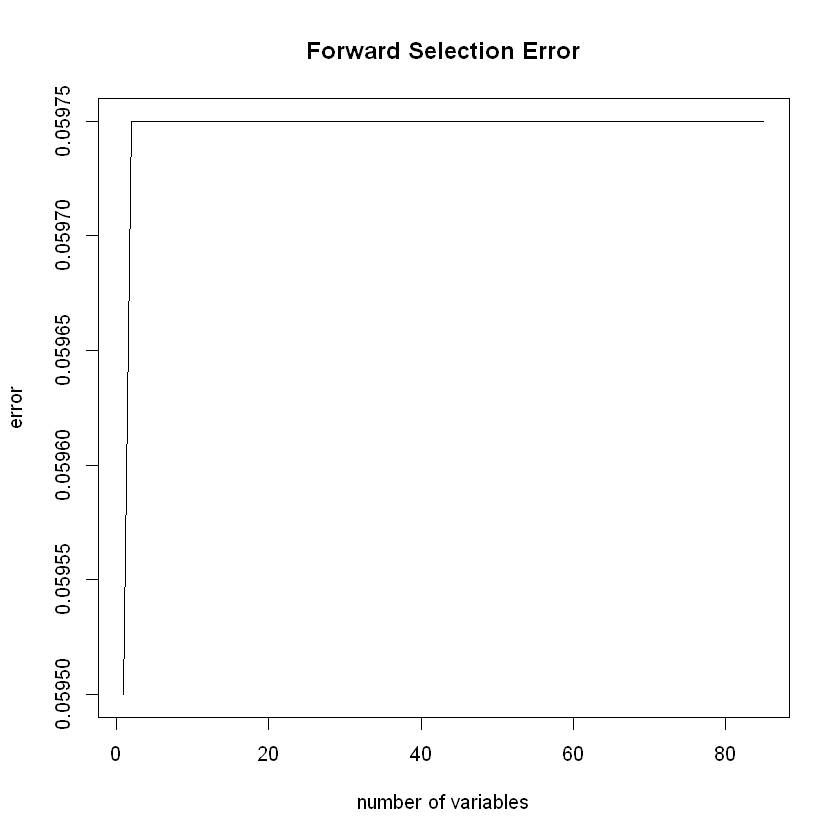

In [72]:
plot(1:85,cv_err_insure_fwd,main = "Forward Selection Error",ylab="error",xlab="number of variables",type='l')

In [55]:
which.min(cv_err_insure_fwd)

[1] 1

- we can see that from the error plot above, the model with lowest error rate from forward subset selection is the model with one only variable. 
- we can also see that, the error rate after 1-variable model stays constant, this is saying that, the additional variables do not contribute in bettering the our prediction accuracy. 

#### Making Predictions

In [69]:
coefi = coef(insure_fwd_mod,id=1)
y_pred_fwd = test_mat_insure[,names(coefi)] %*% coefi

for (i in 1:length(y_pred_fwd)){
        if (y_pred_fwd[i] >= 0.5){
            y_pred_fwd[i] <- 1
        } else{
            y_pred_fwd[i] <- 0
        }
}

#### Confusion Matrix

In [115]:
print("Confusion Matrix for Testing Set: ")
 table(y_pred_fwd,y_test_insure)


[1] "Confusion Matrix for Testing Set: "


          y_test_insure
y_pred_fwd    0    1
         0 3760  237
         1    2    1

- By looking at our confusion, we can observe masking phenomenom. The class "1" is completely masked. 
- Let's choose a different model, since all MSE's are the same after 1-variable, let's just pick the 5-variable model as our model.

#### Making predictions again

In [127]:
coefi = coef(insure_fwd_mod,id=5)
y_pred_fwd = test_mat_insure[,names(coefi)] %*% coefi

for (i in 1:length(y_pred_fwd)){
        if (y_pred_fwd[i] >= 0.5){
            y_pred_fwd[i] <- 1
        } else{
            y_pred_fwd[i] <- 0
        }
}

In [128]:
table(y_pred_fwd,y_test_insure)


          y_test_insure
y_pred_fwd    0    1
         0 3760  237
         1    2    1

- voila, no more masking!

In [189]:
CM_test_fwd = confusionMatrix(factor(y_pred_fwd), factor(data.matrix(y_test_insure)),positive="1")
precision_test_fwd =  CM_test_fwd$byClass['Pos Pred Value']    
recall_test_fwd = CM_test_fwd$byClass['Sensitivity']
F1_score_test_fwd = 2*(precision_test_fwd*recall_test_fwd)/(precision_test_fwd+recall_test_fwd)

In [190]:
data.frame(precision_test_fwd,recall_test_fwd,F1_score_test_fwd,row.names="")

precision_test_fwd,recall_test_fwd,F1_score_test_fwd
0.3333333,0.004201681,0.008298755


- okay, even tho the class "1" is not masked anymore, but our model still performs very poorly in prediction the smaller class correctly, same problem as our linear model before. Let's explore other model selection methods and see if we can find anything better.

## Backwards Selection

In [131]:
insure_bwd_mod <- regsubsets(df_train$V86~., data=df_train, nbest = 1, nvmax= 85, method="backward")

In [132]:
cv_err_insure_bwd <- rep(NA,85) 

for (i in 1:85){
    coefi = coef(insure_bwd_mod,id=i)
    pred = test_mat_insure[,names(coefi)] %*% coefi
    #thresholding
    for (j in 1:length(pred)){
        if (pred[j] >= 0.5){
            pred[j] <- 1
        } else{
            pred[j] <- 0
        }
    }
    
    
    cv_err_insure_bwd[i] = mean((y_test_insure)!=(pred))
}




#### Plot error curve

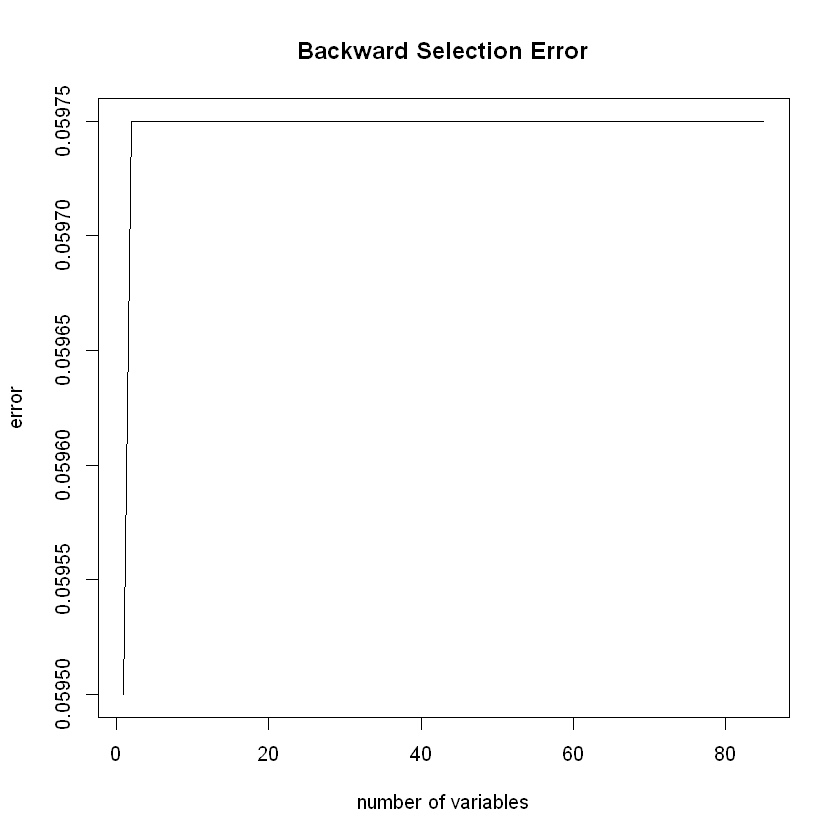

In [133]:
plot(1:85,cv_err_insure_fwd,main = "Backward Selection Error",ylab="error",xlab="number of variables",type='l')

- interesting, note, the backward model generated same exact errors for all models as the forward model.


In [134]:
coefi = coef(insure_bwd_mod,id=5)
y_pred_bwd = test_mat_insure[,names(coefi)] %*% coefi

for (i in 1:length(y_pred_bwd)){
        if (y_pred_bwd[i] >= 0.5){
            y_pred_bwd[i] <- 1
        } else{
            y_pred_bwd[i] <- 0
        }
}

In [135]:
table(y_pred_bwd,y_test_insure)


          y_test_insure
y_pred_bwd    0    1
         0 3760  237
         1    2    1

In [191]:
CM_test_bwd = confusionMatrix(factor(y_pred_bwd), factor(data.matrix(y_test_insure)),positive="1")
precision_test_bwd =  CM_test_bwd$byClass['Pos Pred Value']    
recall_test_bwd = CM_test_bwd$byClass['Sensitivity']
F1_score_test_bwd = 2*(precision_test_bwd*recall_test_bwd)/(precision_test_bwd+recall_test_bwd)

In [192]:
data.frame(precision_test_bwd,recall_test_bwd,F1_score_test_bwd,row.names="")

precision_test_bwd,recall_test_bwd,F1_score_test_bwd
0.3333333,0.004201681,0.008298755


- we can see that everything is the SAME as our forward model. Let's go ahead and check the coefficients for 5-variable (what we chose as our optimal models for each method), and see if the same coefficents were generated

In [251]:
coef(insure_fwd_mod,5)

coef(insure_bwd_mod,5)


(Intercept)          V18          V43          V44          V47          V82 
 0.005436302 -0.005756253  0.007686293  0.017944911  0.010949070  0.288184811

(Intercept)          V10          V18          V47          V59          V82 
 0.003176233  0.006904983 -0.008492691  0.011291811  0.009556631  0.286852633

- we can see that although the errors and the confusion matrices are identical. Different models are generated. We can start to see a pattern here. That linear models, regardless of of how many variables are included tend to perform poorly (low F1 score) in an imbalanced dataset. Let's further examine this using ridge and lasso methods.

## Ridge Regression

In [139]:
library(glmnet)

Warning message:
"package 'glmnet' was built under R version 3.6.3"Loading required package: Matrix
Loaded glmnet 4.0-2


#### Set a range of lambda values of 100 values
- lambda: range(10^10,10^-2)

In [140]:
lambda_range = 10^seq(10,-2,length=100) 

In [141]:
ridge_mod = glmnet(data.matrix(X_train_insure),data.matrix(y_train_insure),alpha=0,lambda=lambda_range)

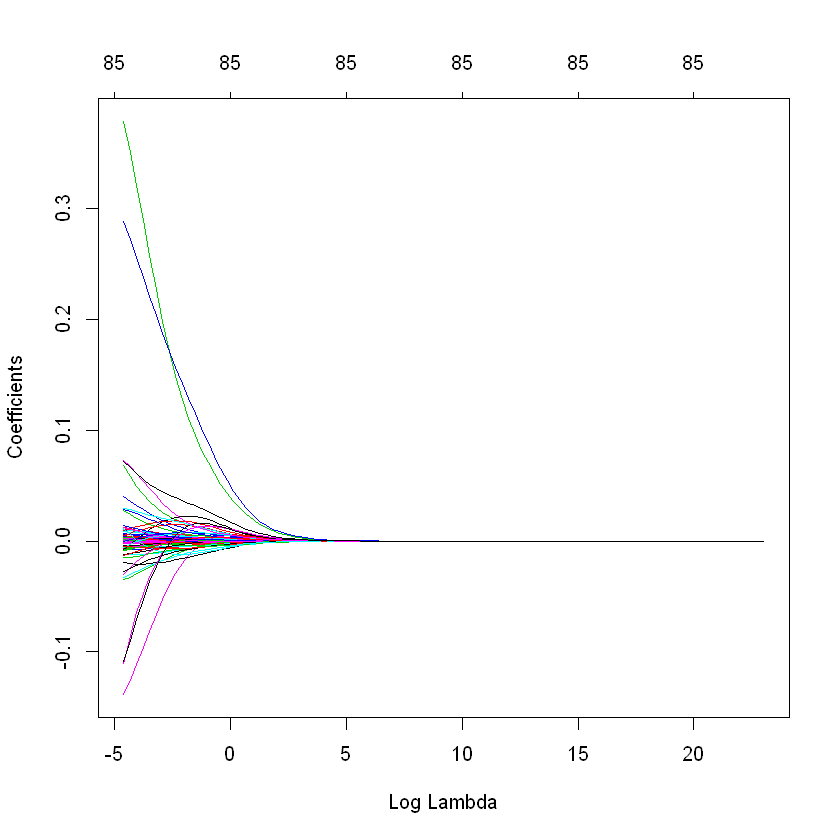

In [142]:
plot(ridge_mod,xvar="lambda")


- visualizing the relationship between coefficients and log lambd

#### Lamda value selection method using cross validation approach

[1] 0.1118244

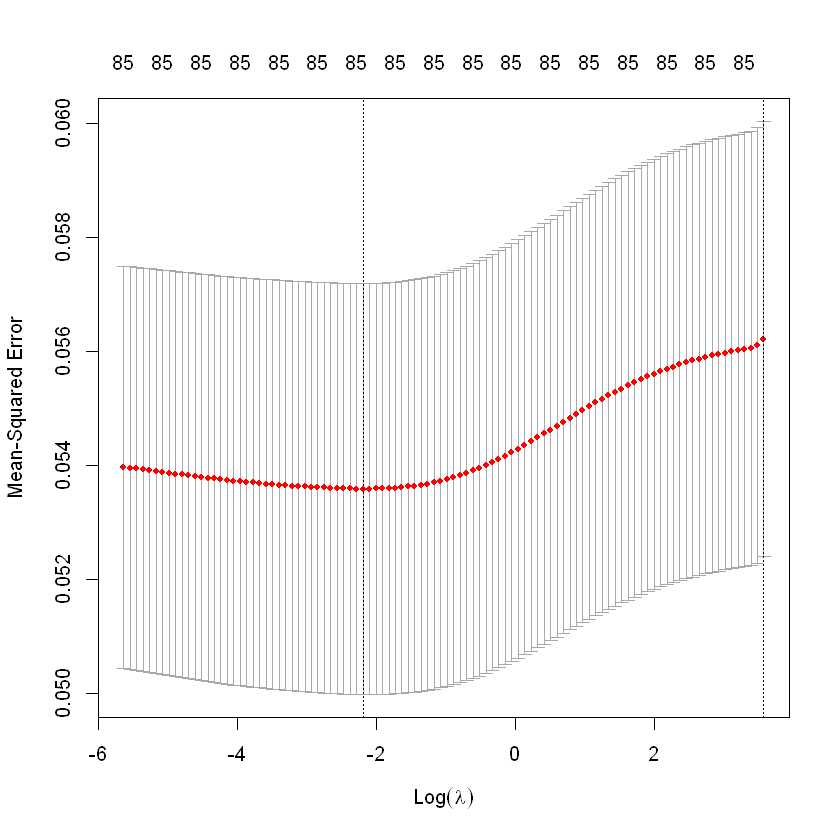

In [143]:
set.seed(20)
cv_err_ridge = cv.glmnet(data.matrix(X_train_insure),data.matrix(y_train_insure),alpha=0)
plot(cv_err_ridge)
bestlam_ridge = cv_err_ridge$lambda.min
bestlam_ridge

- here we can see that the lambda value which minimizes MSE in ridge model is 0.111824383646147

#### Making prediction using our best lambda value

In [144]:
y_pred_ridge = predict(ridge_mod,s=bestlam_ridge,newx=data.matrix(X_test_insure))


In [149]:
for (i in 1:length(y_pred_ridge)){
        if (y_pred_ridge[i] >= 0.5){
            y_pred_ridge[i] <- 1
        } else{
            y_pred_ridge[i] <- 0
        }
}

#### Calculate MSE

In [150]:
MSE_ridge = mse(y_test_insure,y_pred_ridge)
cat("MSE for Ridge method model: ", MSE_ridge)

MSE for Ridge method model:  0.05925

#### Confusion Matrix

In [151]:
table(y_pred_ridge,y_test_insure)

            y_test_insure
y_pred_ridge    0    1
           0 3762  237
           1    0    1

In [193]:
CM_test_ridge = confusionMatrix(factor(y_pred_bwd), factor(data.matrix(y_test_insure)),positive="1")
precision_test_ridge =  CM_test_ridge$byClass['Pos Pred Value']    
recall_test_ridge = CM_test_ridge$byClass['Sensitivity']
F1_score_test_ridge = 2*(precision_test_ridge*recall_test_ridge)/(precision_test_ridge+recall_test_ridge)

In [194]:
data.frame(precision_test_ridge,recall_test_ridge,F1_score_test_ridge,row.names="")

precision_test_ridge,recall_test_ridge,F1_score_test_ridge
0.3333333,0.004201681,0.008298755


## Lasso Regression 

In [ ]:
lambda_range = 10^seq(10,-2,length=100) 

In [154]:
lasso_mod = glmnet(data.matrix(X_train_insure),data.matrix(y_train_insure),alpha=1,lambda=lambda_range)

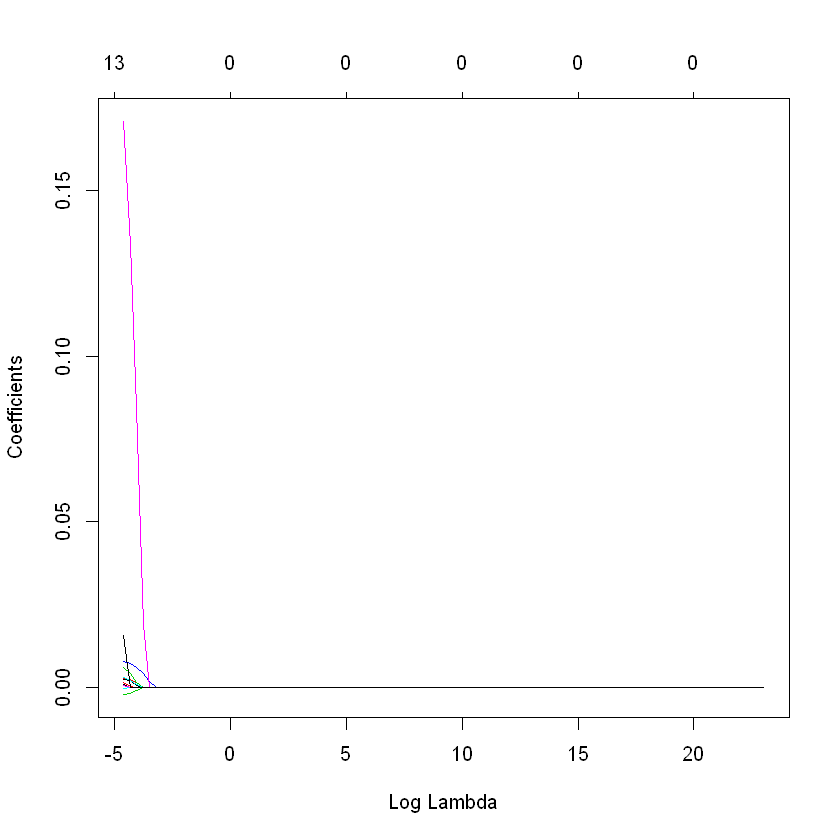

In [156]:
plot(lasso_mod,xvar="lambda")


- we can see that the coeficients become zero really early, around where log(lambda=-5) ~ 0.05

#### Best Lambda Value selection using cross validation method

[1] 0.003184799

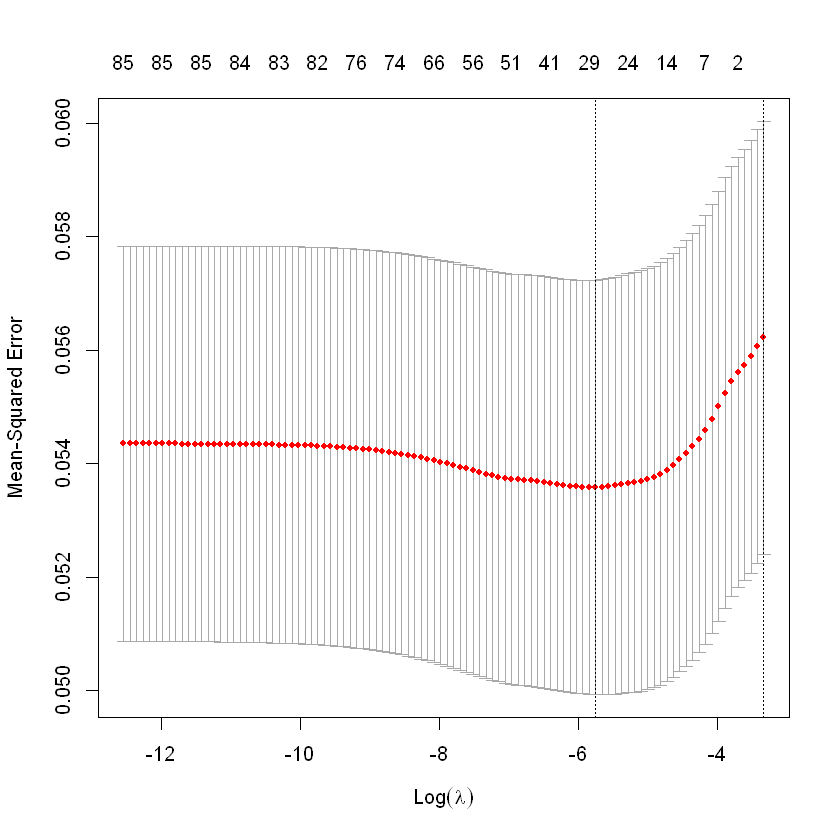

In [240]:
set.seed(20)
cv_err_lasso = cv.glmnet(data.matrix(X_train_insure),data.matrix(y_train_insure),alpha=1)
plot(cv_err_lasso)
bestlam_lasso = cv_err_lasso$lambda.min
bestlam_lasso

#### Prediction using our best lambda value

In [241]:
y_pred_lasso = predict(lasso_mod,s=bestlam_lasso,newx=data.matrix(X_test_insure))

In [242]:
for (i in 1:length(y_pred_lasso)){
        if (y_pred_lasso[i] >= 0.5){
            y_pred_lasso[i] <- 1
        } else{
            y_pred_lasso[i] <- 0
        }
}

#### Calculate MSE

In [243]:
MSE_lasso = mse(y_test_insure,y_pred_lasso)
cat("MSE for Ridge method model: ", MSE_lasso)

MSE for Ridge method model:  0.0595

#### Confusion Matrix

In [244]:
table(y_pred_lasso,y_test_insure)

            y_test_insure
y_pred_lasso    0    1
           0 3762  238

- we observe masking again, however it's quite difficult to adjust our lambda value by just looking and guessing around, as we can see in our backward selection example, by choosing a different model although we avoided masking, it did not provide any betterresult. Therefore we are going to proceed. We are not going to calculate precision, recall and f1-score since we have masking in our solution

#### Taking a look at our coefficient 

In [245]:
predict(lasso_mod,type="coefficients",s=bestlam_ridge)

86 x 1 sparse Matrix of class "dgCMatrix"
                     1
(Intercept) 0.05977327
V1          .         
V2          .         
V3          .         
V4          .         
V5          .         
V6          .         
V7          .         
V8          .         
V9          .         
V10         .         
V11         .         
V12         .         
V13         .         
V14         .         
V15         .         
V16         .         
V17         .         
V18         .         
V19         .         
V20         .         
V21         .         
V22         .         
V23         .         
V24         .         
V25         .         
V26         .         
V27         .         
V28         .         
V29         .         
V30         .         
V31         .         
V32         .         
V33         .         
V34         .         
V35         .         
V36         .         
V37         .         
V38         .         
V39         .         
V40         .  

- everything is set to 0

#### To answer the question who is more likely to purchase a caravan insurance policy,
- let's take a look at the most correlated (>0.9) with respect to our response variables
- let's take a look at the likelihood P(class|feature) of these variables

In [282]:
sort(abs(cor(df_train)[,86]),)

V66          V38          V45          V41           V8          V27 
0.0007589975 0.0009823603 0.0018523902 0.0020132359 0.0040394037 0.0040402607 
          V4          V63          V49           V6          V48          V33 
0.0044906973 0.0055281002 0.0056301608 0.0062254235 0.0065406802 0.0077680756 
         V14          V77          V70          V71          V69          V72 
0.0079814297 0.0084919429 0.0085891397 0.0089630287 0.0091760865 0.0094282251 
         V56          V50           V2          V60          V52          V74 
0.0096326131 0.0097358668 0.0098090276 0.0116891605 0.0122766711 0.0125550985 
         V51          V53          V73          V84          V55          V67 
0.0126284578 0.0143800095 0.0172020197 0.0180255830 0.0211521954 0.0212790767 
         V46          V20          V79          V81          V62          V26 
0.0216306917 0.0219744985 0.0223373107 0.0262010877 0.0286954418 0.0287629713 
         V58          V15           V7          V11          V78          V83 
0.0305286401 0.0323460866 0.0328663302 0.0333622934 0.0335484032 0.0341439482 
          V3          V76          V57           V9          V28          V23 
0.0355731574 0.0371176230 0.0402076295 0.0417068857 0.0423093665 0.0424958378 
         V17          V54          V75          V22          V13          V21 
0.0435170674 0.0444097107 0.0451163962 0.0477161872 0.0531021574 0.0540025663 
         V24          V36          V39          V40          V35          V80 
0.0546323865 0.0575181930 0.0576918269 0.0579205699 0.0583778481 0.0613811660 
         V12          V64          V29          V25          V19          V85 
0.0622853593 0.0627888617 0.0630702655 0.0634975982 0.0650816060 0.0666578513 
          V5           V1          V32          V10          V34          V31 
0.0692998304 0.0693852373 0.0699738688 0.0702638279 0.0765007839 0.0784289165 
         V30          V37          V16          V65          V42          V18 
0.0791434984 0.0797651169 0.0846353376 0.0893874727 0.0901853820 0.0905613304 
         V61          V59          V43          V44          V82          V68 
0.0913611589 0.0944459897 0.0959382627 0.0964626877 0.1056995045 0.1442104645 
         V47          V86 
0.1509097148 1.0000000000

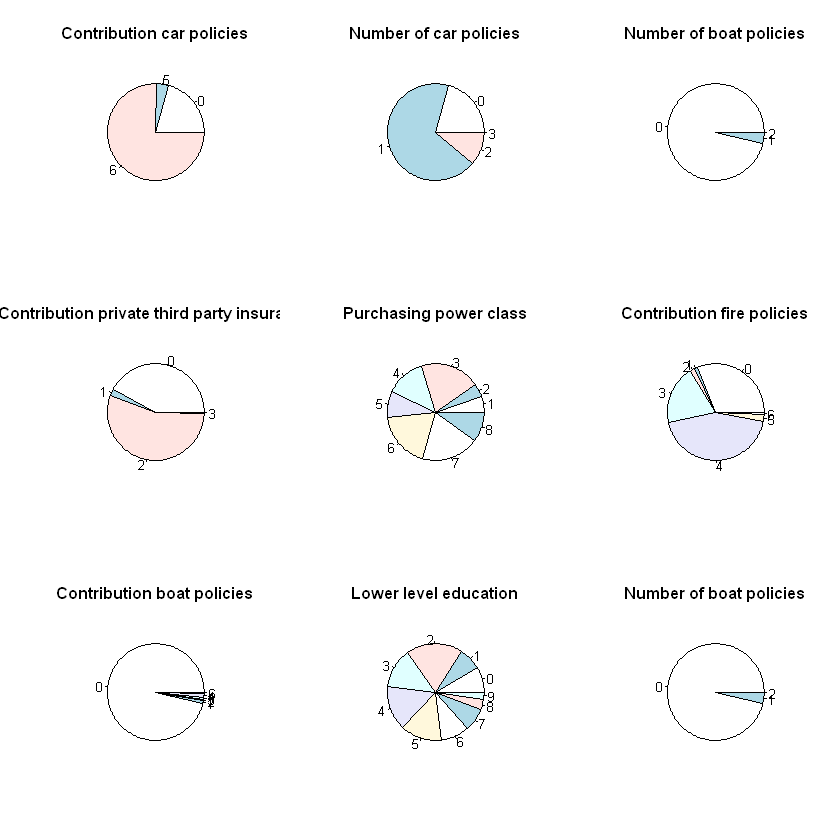

In [306]:
par(mfrow=c(3,3))

v47<-table(df_train$V47[df_train$V86==1])
pie(v47,main ="Contribution car policies")

v68<-table(df_train$V68[df_train$V86==1])
pie(v68,main ="Number of car policies")

v82<-table(df_train$V82[df_train$V86==1])
pie(v82,main ="Number of boat policies")

v44<-table(df_train$V44[df_train$V86==1])
pie(v44,main ="Contribution private third party insurance")

v43<-table(df_train$V43[df_train$V86==1])
pie(v43,main ="Purchasing power class")

v59<-table(df_train$V59[df_train$V86==1])
pie(v59,main ="Contribution fire policies")

v61<-table(df_train$V61[df_train$V86==1])
pie(v61,main ="Contribution boat policies")

v18<-table(df_train$V18[df_train$V86==1])
pie(v18,main ="Lower level education")

v82<-table(df_train$V82[df_train$V86==1])
pie(v82,main ="Number of boat policies")




#### let's take a look at some intersting variables

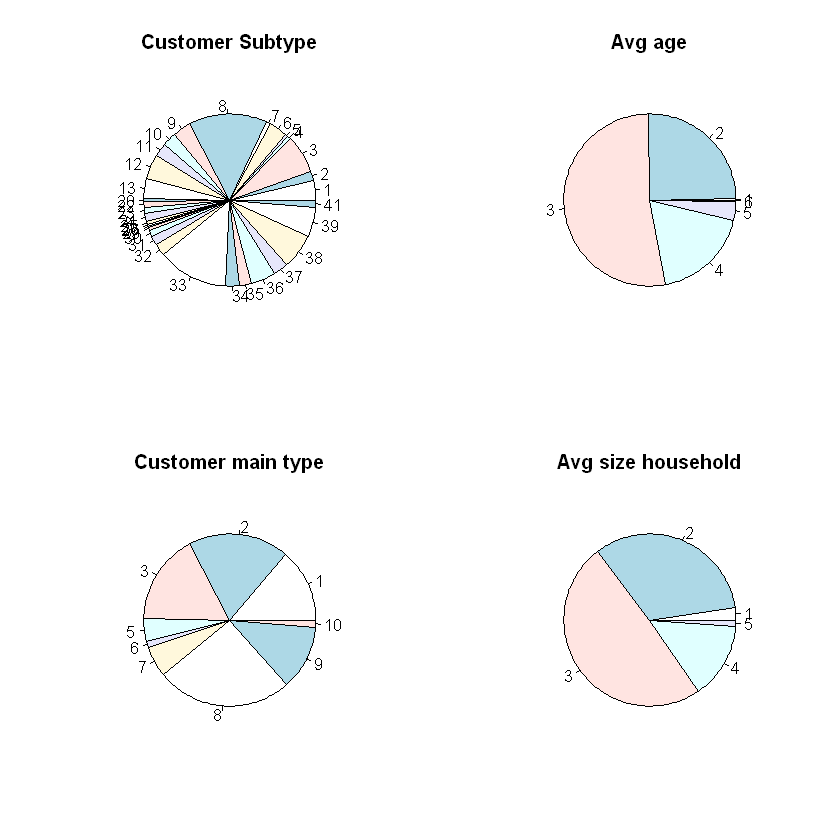

In [315]:
par(mfrow=c(2,2))
v1<-table(df_train$V1[df_train$V86==1])
pie(v1,main ="Customer Subtype")

v4<-table(df_train$V4[df_train$V86==1])
pie(v4,main ="Avg age")

v5<-table(df_train$V5[df_train$V86==1])
pie(v5,main ="Customer main type")


v3<-table(df_train$V3[df_train$V86==1])
pie(v3,main ="Avg size household")

- by looking at the pie charts above:
    - amount of car insurance paid : 1000 - 4999
    - number of car insurance owned: 1
    - has third party insurance
    - mostly don't pay boat insruance or own boat 
    - pay 200-499 for fire policy
    - customer subtype 8, 33: middle class families, or lower class large families
    - mostly 20-30  years old
    - customer main type: large family, family with grownups
    - Average household: 2,3,4
 - we kinda see a group of people who pays a lot of insurance for one car. And the insurance owner is 20-30 year old with a family. Either in middle class/ lower with a median to large family. Seem like a group that would take a lot of a family vacations and road trips!

### Conclusion

In [237]:
data.frame(F1_score_test,F1_score_test_fwd,F1_score_test_bwd,F1_score_test_ridge,row.names=" ")


,F1_score_test,F1_score_test_fwd,F1_score_test_bwd,F1_score_test_ridge
,0.008298755,0.008298755,0.008298755,0.008298755


In [236]:
table(y_pred_insure_test,y_test_insure)
table(y_pred_fwd,y_test_insure)
table(y_pred_bwd,y_test_insure)
table(y_pred_ridge,y_test_insure)
table(y_pred_lasso,y_test_insure)

                  y_test_insure
y_pred_insure_test    0    1
                 0 3760  237
                 1    2    1

          y_test_insure
y_pred_fwd    0    1
         0 3760  237
         1    2    1

          y_test_insure
y_pred_bwd    0    1
         0 3760  237
         1    2    1

            y_test_insure
y_pred_ridge    0    1
           0 3762  237
           1    0    1

            y_test_insure
y_pred_lasso    0    1
           0 3762  238

- Finally,the point to take away from this problem is that when dealing with an imbalanced / biased dataset (in this case ~94% "0"s and 6% "1s"), simple performing a regression /classfication model and measure its performance by MSE will simply not going to give you what you want. When working with an imbalanced classification problem, the minority class is typically of the most interest. This means that a model’s skill in correctly predicting the class label or probability for the minority class is more important than the majority class or classes. In our case we see that in almost all models above class of "1", our minority group resulted in mostly false negatives, in severe cases we even see masking. There are ways to  deal with challege:
    - using the right performance metrics, such as f1-score
    - over/under sampling
    - generating synthetic data etc.
    
 

# Question 2

2) We have seen that as the number of features used in a model increases, the
training error will necessarily decrease, but the test error may not. We will now
explore this in a simulated data set.
Generate a data set with p = 20 features, n = 1, 000 observations, and an
associated quantitative response vector generated according to the model

Y =X*Beta + e

where β has some elements that are exactly equal to zero. Split your data set into
a training set containing 800 observations and a test set containing 200
observations.
Perform best subset selection or forward stepwise selection -- on the training set,
and plot the training set MSE associated with the best model of each size. Plot
the test set MSE associated with the best model of each size.


For which model size does the test set MSE take on its minimum value?
Comment on your results. How does the model at which the test set MSE is
minimized compare to the true model used to generate the data? Comment on the
coefficient values.

#### Randomly enerate X matrix - 100*20, using rnorm 

In [202]:
set.seed(8989)
sim_df <- matrix(, nrow =1000, ncol = 20)
for(column in 1:20){
  sim_df[, column] <- rnorm(1000,mean=2,sd=4)
}


#### name the variables

In [203]:
colnames(sim_df) <- c("Var1","Var2","Var3","Var4","Var5","Var6","Var7","Var8","Var9","Var10","Var11",
                "Var12","Var13","Var14","Var15","Var16","Var17","Var18","Var19","Var20")


In [204]:
head(sim_df)
dim(sim_df)

Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,Var11,Var12,Var13,Var14,Var15,Var16,Var17,Var18,Var19,Var20
0.5899540,7.6557120,-7.1979743,3.3339426,4.7491648,1.4539029,-4.9459782,0.47432583,2.312378,-0.6815444,6.8389075,6.381265,3.8094817,-4.142716,-1.9235424,0.3917823,-0.2464930,-0.3018462,-3.733281,7.3470128
2.9269113,0.4947942,-2.0123855,3.8815339,9.3410245,9.0440503,2.4866724,-6.08230796,1.325527,7.8101041,-3.2556310,-1.349193,3.9673540,4.475452,-7.2890262,1.5260523,0.5285554,7.7544583,3.302379,4.2864024
-1.1401706,4.1437642,-3.1134437,0.4143469,-0.9110781,0.8634104,0.6106556,-0.05907016,6.750857,11.5009168,0.8302854,-6.022417,-1.9807823,1.323191,3.3259144,5.3779171,2.8121452,-2.9889996,12.513585,-1.9415721
2.4834228,1.1414497,0.3419856,12.2584136,1.7044997,2.1544490,-7.8726140,-0.72548522,5.483285,14.6904116,-3.6167791,3.781231,5.9204764,2.668345,1.4607624,4.4476727,3.7377474,-1.2918495,3.071980,-3.4825944
0.3059988,4.8298619,0.8162793,1.6364514,6.2544056,-4.3138342,5.3734103,6.44811055,1.136111,-0.2450956,2.1020690,-2.484432,-0.9902991,-3.857786,0.3240063,3.2358775,5.6506824,3.4558206,1.857429,5.8300298
2.5181749,-0.7939086,-0.1929420,-1.5275363,2.3742929,0.4298700,4.5016804,-4.36224303,2.603856,6.0865402,2.4513135,6.678859,10.7450483,1.197975,1.3789283,3.5518914,5.4125069,6.1429933,7.394971,0.3657843


[1] 1000   20

#### Randomly generate coefficient vector (beta) using runif

In [205]:
set.seed(890890)
coef  = runif(20, min=-5, max=5)

#### Setting some coefficients to 0

In [206]:
coef[3] = 0
coef[6] = 0
coef[9] = 0
coef[10] = 0
coef[13] = 0
coef[17] = 0
coef[19] = 0


In [152]:
coef

[1]  3.8018755 -3.7400947  0.0000000  3.5505919 -2.7832124  0.0000000
 [7] -0.3144073 -4.6157098  0.0000000  0.0000000  0.7408017 -4.2549240
[13]  0.0000000 -0.9728465  1.0649179 -2.1191827  0.0000000 -2.3792273
[19]  2.5877241  4.0746763

#### Randomly generate error vector

In [188]:
set.seed(654)
err = rnorm(1000,mean=0,sd=1)


#### Calculate Actual response variable - Y-actual
- this is our groundtruth

In [207]:
Y_actual<-sim_df%*% coef

In [208]:
colnames(Y_actual) <- "Y_actual"

In [209]:
sim_df<- cbind(sim_df,Y_actual)

In [210]:
head(sim_df)

Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var12,Var13,Var14,Var15,Var16,Var17,Var18,Var19,Var20,Y_actual
0.5899540,7.6557120,-7.1979743,3.3339426,4.7491648,1.4539029,-4.9459782,0.47432583,2.312378,-0.6815444,...,6.381265,3.8094817,-4.142716,-1.9235424,0.3917823,-0.2464930,-0.3018462,-3.733281,7.3470128,-18.6840326
2.9269113,0.4947942,-2.0123855,3.8815339,9.3410245,9.0440503,2.4866724,-6.08230796,1.325527,7.8101041,...,-1.349193,3.9673540,4.475452,-7.2890262,1.5260523,0.5285554,7.7544583,3.302379,4.2864024,11.3480968
-1.1401706,4.1437642,-3.1134437,0.4143469,-0.9110781,0.8634104,0.6106556,-0.05907016,6.750857,11.5009168,...,-6.022417,-1.9807823,1.323191,3.3259144,5.3779171,2.8121452,-2.9889996,12.513585,-1.9415721,0.5527117
2.4834228,1.1414497,0.3419856,12.2584136,1.7044997,2.1544490,-7.8726140,-0.72548522,5.483285,14.6904116,...,3.781231,5.9204764,2.668345,1.4607624,4.4476727,3.7377474,-1.2918495,3.071980,-3.4825944,9.4262748
0.3059988,4.8298619,0.8162793,1.6364514,6.2544056,-4.3138342,5.3734103,6.44811055,1.136111,-0.2450956,...,-2.484432,-0.9902991,-3.857786,0.3240063,3.2358775,5.6506824,3.4558206,1.857429,5.8300298,-35.0475397
2.5181749,-0.7939086,-0.1929420,-1.5275363,2.3742929,0.4298700,4.5016804,-4.36224303,2.603856,6.0865402,...,6.678859,10.7450483,1.197975,1.3789283,3.5518914,5.4125069,6.1429933,7.394971,0.3657843,-27.7205838


#### Train Test Split 
- 80% train, 20% test

In [211]:
set.seed(1)

In [212]:
indi = sample(1:length(sim_df[,1]), 4/5*length(sim_df[,1]))
sim_train_df = data.frame(sim_df[indi,])
sim_test_df = data.frame(sim_df[-indi,])


### Best Subset Selection

In [213]:
sim_exh_mod <- regsubsets(sim_train_df$Y_actual~., data=sim_train_df, nbest = 1, nvmax= 20, method="exhaustive")

#### Make predictions

In [214]:
mat_sim_train = model.matrix(sim_train_df$Y_actual~.,data=sim_train_df)
mat_sim_test = model.matrix(sim_test_df$Y_actual~.,data=sim_test_df)


#### Calculate MSE

In [215]:
MSE_sim_train = c()
MSE_sim_test = c()
for (i in 1:20){
    coefi = coef(sim_exh_mod,i)
    y_pred_sim_train = mat_sim_train[,names(coefi)] %*% coefi
    MSE_sim_train[i] = mse(sim_train_df$Y_actual,y_pred_sim_train)
    y_pred_sim_test = mat_sim_test[,names(coefi)] %*% coefi
    MSE_sim_test[i] = mse(sim_test_df$Y_actual,y_pred_sim_test)
}
    


#### Plot training and testing error

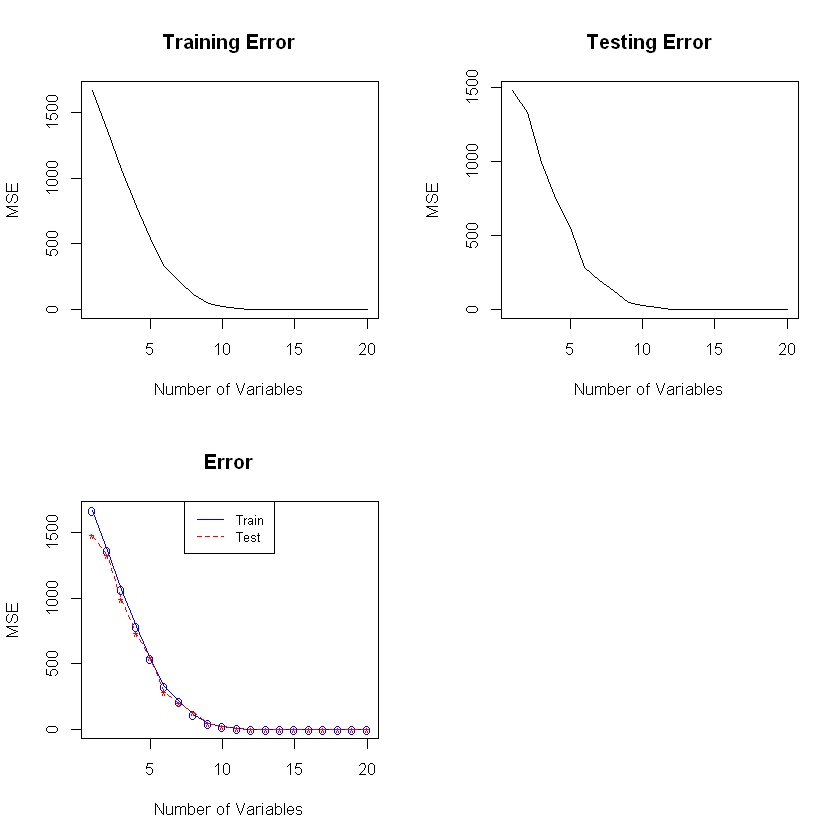

In [216]:
par(mfrow=c(2,2))
plot(1:20,MSE_sim_train,type="l",main = "Training Error",xlab="Number of Variables",ylab="MSE")
plot(1:20,MSE_sim_test,type="l",main = "Testing Error",xlab="Number of Variables",ylab="MSE",)

plot(1:20, MSE_sim_train, type="o", col="blue", pch="o",main = "Error",xlab="Number of Variables",ylab="MSE")
points(1:20, MSE_sim_test, col="red", pch="*")
lines(1:20, MSE_sim_test, col="red",lty=2)
legend("top",legend=c("Train", "Test"),col=c("blue", "red"), lty=1:2,cex=0.8)



- we can see from the three graphs above that test and train errors dont behave too differently as number of variables increases (the trends are almost identical). It is important to note here that, training error will decrease as the number of variable increases, however this is not the same for testing error. The testing error should have a u-shape like graph. Because the error is high with few variables (underfitting) and as the number of variables increases the testing error would decrease (just right), and until it goes up again, since inclusion of too many variables in the model would reduce the generalizability of the model and perform badly on the new dataset. A phenomenom known as overfitting.
- More over we can see that, starting from 10 variables, the error does not decrease too much afterward (for both testing and training). Personally, I would choose the 10-variable and proceed even if it does not necessarily have the lowest error.
- It is important to note, we expect to see a U shape in MSE vs. number of variable graphs ideally, in order to observe a underfitting to overfitting process. 

In [217]:
which.min(MSE_sim_test)

[1] 16

In [221]:
min(MSE_sim_test)

[1] 1.674952e-26

- By using the best subset selection method, the model that generates the smallest testing error is the model with 16 variables. Let's take a look at which 16 are included:

In [222]:
coef(sim_exh_mod,16)

(Intercept)          Var1          Var2          Var3          Var4 
 1.598721e-14  3.801875e+00 -3.740095e+00 -4.440892e-16  3.550592e+00 
         Var5          Var6          Var7          Var8         Var11 
-2.783212e+00 -1.536965e-15 -3.144073e-01 -4.615710e+00  7.408017e-01 
        Var12         Var14         Var15         Var16         Var17 
-4.254924e+00 -9.728465e-01  1.064918e+00 -2.119183e+00 -9.436896e-16 
        Var18         Var20 
-2.379227e+00  4.074676e+00

In [227]:
cbind(rbind("Variables not included in the model:","Variables = 0 in the original model:"),rbind("9,10,13,19","3,6,9,10,13,17,19"))

Variables not included in the model:,"9,10,13,19"
Variables = 0 in the original model:,"3,6,9,10,13,17,19"


- we can see that variable: 9,10,13,19 are not included in the 16-variable model which is our optimal model. This is essentially saying that the inclusion of these models actually lower the performance of our linear model. 
- we already know what variables do not contribute to the model since we have set beta (the parameters) to 0 when we tried to simulate our model. 
- So the question is, were we able to recover the original model, in this case the optimal model would have been a 13-variable model exluding the variables with beta set to 0 in the first place. 
    - not quite! We were not able to recover the original model, however, the model did not do a terrible job. In the table above, we can see that the model had decided 9,10,13,19 were not useful, and these are 4 of the 7 variables we set to 0 in the beginning! And variable 3, 6 and 17 are included in our model however. 


# Question 3 part a.
a) Perform k-nearest neighbor on the data for a range of k values. Plot the error
rate as a function of k. Report the confusion matrix for the optimal model.
Comment on the ability of kNN to discriminate the various species.

In [8]:
library(datasets)

In [7]:
data(iris)

## Exploring the dataset

In [6]:
head(iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


In [7]:
dim(iris)

[1] 150   5

In [8]:
str(iris)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


In [321]:
sum(is.na(iris))

[1] 0

In [322]:
summary(iris)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

- we can the range for each variables are slightly far from each other. It is very important to scale our data before performing KNN. So let's do that after the splitting our data into training and testing set. 

#### Train test split
- Since this is a smaller data set, we will split our data into 7:3 split, so we will have enough data in testing set.
- Also note that, the response variables are uniformly distributed, meaning that each class has the same number of observations belong to them.
- Since this is a really small dataset, when we split the 150 datapoints into two groups, we need to make sure that both training and testing (especially testing) sets need to include relatively even amount of datapoints from each species (stratified sampling. So let's do that!!

In [9]:
set.seed(666666)

In [10]:
setosa <- iris[iris$Species=="setosa",]
versicolor <- iris[iris$Species=="versicolor",]
virginica <- iris[iris$Species=="virginica",]



In [11]:
indi <- sample(1:50, 50*0.7)
iris_train_df<- rbind(setosa[indi,], versicolor[indi,], virginica[indi,])
iris_test_df<- rbind(setosa[-indi,], versicolor[-indi,], virginica[-indi,])


- 70% of data from each species is put into training and the rest is testing 

#### Define dependent and independent variable

- we also scaled the variables, separately, after splitting them into training and testing sets

In [12]:
X_train_iris_df = scale(iris_train_df[,-5])
y_train_iris_df = iris_train_df[,5]

In [13]:
X_test_iris_df = scale(iris_test_df[,-5])
y_test_iris_df = iris_test_df[,5]

## KNN without PCA

In [ ]:
library(class)


#### Presetting the neighbor parameter
- k = 1 to 21 odd numbers, to avoid ties in even numbered neighbors

In [9]:
neighbors = c(seq(1,21,2))

#### perform knn and calculate training and testing errors

In [344]:
MSE_KNN_iris_train <- c()
MSE_KNN_iris_test <- c()

for (i in 1:length(neighbors))
{
    knn_predict_train <- knn(train = X_train_iris_df, test = X_train_iris_df, cl = y_train_iris_df, k = neighbors[i])
    knn_predict_test <- knn(train = X_train_iris_df, test = X_test_iris_df, cl = y_train_iris_df, k = neighbors[i])    
    MSE_KNN_iris_train[i] <-mean(knn_predict_train != y_train_iris_df)
    MSE_KNN_iris_test[i] = mean(knn_predict_test != y_test_iris_df)
}

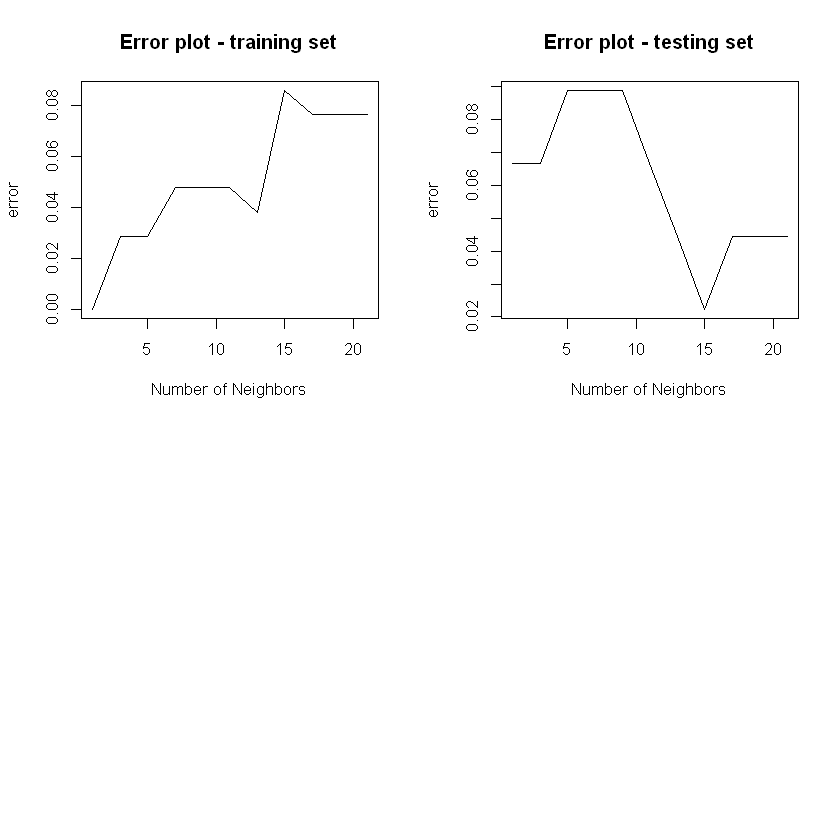

In [345]:
par(mfrow=c(2,2))
plot(neighbors,MSE_KNN_iris_train,main = "Error plot - training set",xlab = "Number of Neighbors",ylab="error",type="l")
plot(neighbors,MSE_KNN_iris_test,main = "Error plot - testing set",xlab = "Number of Neighbors",ylab="error",type="l")

- we can see from the two graphs above that:
    - training error: increases as k get's bigger (although there are incidences where the training error decreased as k got bigger, but the general trend is a proportional relationship between the two). This makes sense for training set, since the smaller the k is, the more overfitted the model to the data is.
    - testing error: We can kind of see a pattern of decreasing and then increasing, with error being lowest at k = 15. we will go head and use that as our optimal model.
    


#### Confusion Matrix with our optimal model k = 15

In [346]:
knn_pred_train <- knn(train = X_train_iris_df, test = X_train_iris_df, cl = y_train_iris_df, k = 15)

In [347]:
table(knn_pred_train,y_train_iris_df)

              y_train_iris_df
knn_pred_train setosa versicolor virginica
    setosa         35          0         0
    versicolor      0         30         4
    virginica       0          5        31

In [386]:
train_mse = mean(knn_pred_train != y_train_iris_df)

cat("The training MSE is:",train_iris_mse)

The training MSE is: 0.08571429

In [350]:
knn_pred_test <- knn(train = X_train_iris_df, test = X_test_iris_df, cl = y_train_iris_df, k = 15)

In [351]:
table(knn_pred_test,y_test_iris_df)

             y_test_iris_df
knn_pred_test setosa versicolor virginica
   setosa         15          0         0
   versicolor      0         15         1
   virginica       0          0        14

In [385]:
test_mse = mean(knn_pred_test != y_test_iris_df)

cat("The testing MSE is:",test_iris_mse)

The testing MSE is: 0.02222222

- Overall, KNN perform really well on the iris dataset, but it is very impportant to note that iris dataset is a quite ideal and simple dataset with:
    - very few features, p = 4
    - 100% balanced dataset 
    - although not ideal: only 150 datapoints
- KNN cons:
    - KNN tend to perform badly with high-p data, since calculating  euclidean distance would be an issue (should perform dimensionality reduction beforehand)
    - The KNN algorithm has a high prediction cost for large datasets. This is because in large datasets the cost of calculating distance between new point and each existing point becomes higher.
    - KNN performs badly if there's a categorical feature, since finding the distance between dimension with categorical features are difficult
- we can see very clearly that KNN actually performed really well, but we can see that the iris dataset is essentially the perfect dataset for an algorithm like KNN. If you have datasets that has properties of what is described above (KNN cons), knn might not perform well. 

# Question 3 Part b:
## KNN with PCA
b).Perform k-nearest neighbor on the first two principal components. Plot the
error rate as a function of k. Report the confusion matrix. Plot the scores for
the first two principal components and color the samples by class (Species).
How does error rate compare to Part (A)?

In [14]:
library(class)
library(stats)

#### Perform Principle Component Analysis 
- note to set scale to false, since we already scaled the data before performing KNN in part a

In [15]:
pca_iris_train = prcomp(X_train_iris_df,scale=FALSE)
pca_iris_test = prcomp(X_test_iris_df,scale=FALSE)

In [16]:
pca_iris_train
summary(pca_iris_train)

Standard deviations (1, .., p=4):
[1] 1.7001609 0.9680455 0.3878045 0.1481503

Rotation (n x k) = (4 x 4):
                    PC1         PC2        PC3        PC4
Sepal.Length  0.5201165 0.383985043 -0.7227723 -0.2442018
Sepal.Width  -0.2592431 0.921242422  0.2583601  0.1317403
Petal.Length  0.5829914 0.006883709  0.1536375  0.7977902
Petal.Width   0.5677965 0.061810202  0.6222908 -0.5352951

Importance of components:
                          PC1    PC2    PC3     PC4
Standard deviation     1.7002 0.9680 0.3878 0.14815
Proportion of Variance 0.7226 0.2343 0.0376 0.00549
Cumulative Proportion  0.7226 0.9569 0.9945 1.00000

In [17]:
pca_iris_test
summary(pca_iris_test)

Standard deviations (1, .., p=4):
[1] 1.7315871 0.9326110 0.3380602 0.1325069

Rotation (n x k) = (4 x 4):
                    PC1        PC2        PC3         PC4
Sepal.Length  0.5231999 0.36953974  0.7196669 -0.26792134
Sepal.Width  -0.2888946 0.92461418 -0.2296495  0.09428489
Petal.Length  0.5725745 0.06019024 -0.1477885  0.80417296
Petal.Width   0.5612132 0.07004375 -0.6383567 -0.52214401

Importance of components:
                          PC1    PC2     PC3     PC4
Standard deviation     1.7316 0.9326 0.33806 0.13251
Proportion of Variance 0.7496 0.2174 0.02857 0.00439
Cumulative Proportion  0.7496 0.9670 0.99561 1.00000

In [18]:
pca_score_train = pca_iris_train$x[,1:2]
pca_score_test = pca_iris_test$x[,1:2]


In [19]:
pca_df_train = pca_iris_train$x[,1:2]
pca_df_train = data.frame(pca_df_train,y_train_iris_df)

pca_df_test = pca_iris_test$x[,1:2]
pca_df_test = data.frame(pca_df_test,y_test_iris_df)

#### Plot the pca score for training set

In [34]:
install.packages("ellipse")

Installing package into 'C:/Users/qlian/OneDrive/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'ellipse' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\qlian\AppData\Local\Temp\RtmpgxielO\downloaded_packages


In [35]:
library(ellipse)

Warning message:
"package 'ellipse' was built under R version 3.6.3"
Attaching package: 'ellipse'

The following object is masked from 'package:graphics':

    pairs



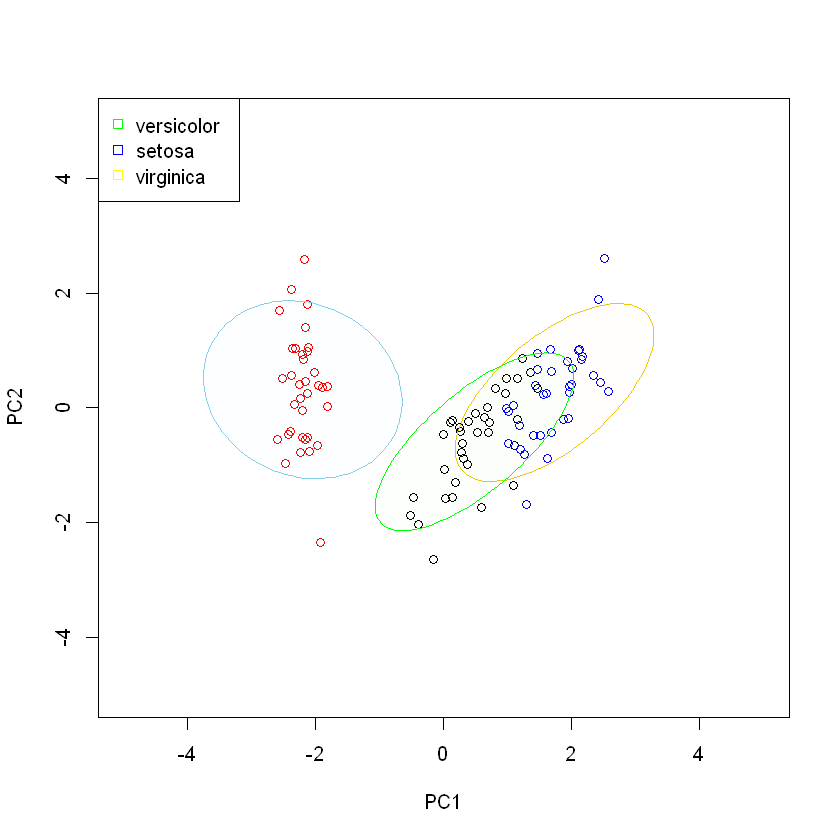

In [63]:

col_choice <- rep("black", length(pca_score_train[,1]))
id_set <- which(pca_df_train$y_train_iris_df == "setosa")
id_vir <- which(pca_df_train$y_train_iris_df == "virginica")
id_ver <- which(pca_df_train$y_train_iris_df == "versicolor")

col_choice[id_set] <- "red"
col_choice[id_vir] <- "blue"

plot(pca_score_train, xlim = c(-5, 5), ylim = c(-5,5), col = col_choice)

polygon(ellipse(x=cor(pca_df_train[id_set,1],pca_df_train[id_set,2]), centre=colMeans(pca_score_train[id_set,1:2]), level=0.70), col=adjustcolor("skyblue2", alpha.f=0.01), border="skyblue")
polygon(ellipse(x=cor(pca_df_train[id_vir,1],pca_df_train[id_vir,2]), centre=colMeans(pca_score_train[id_vir,1:2]), level=0.70), col=adjustcolor("gold2", alpha.f=0.01), border="gold2")
polygon(ellipse(x=cor(pca_df_train[id_ver,1],pca_df_train[id_ver,2]), centre=colMeans(pca_score_train[id_ver,1:2]), level=0.70), col=adjustcolor("green2", alpha.f=0.01), border="green")



# text(pca_score_train, col = col_choice, labels = 1:length(pima[,1]))
legend("topleft", c("versicolor", "setosa","virginica"), pch = .5, col = c("green", "blue","yellow"))

#### Plot the score for testing set

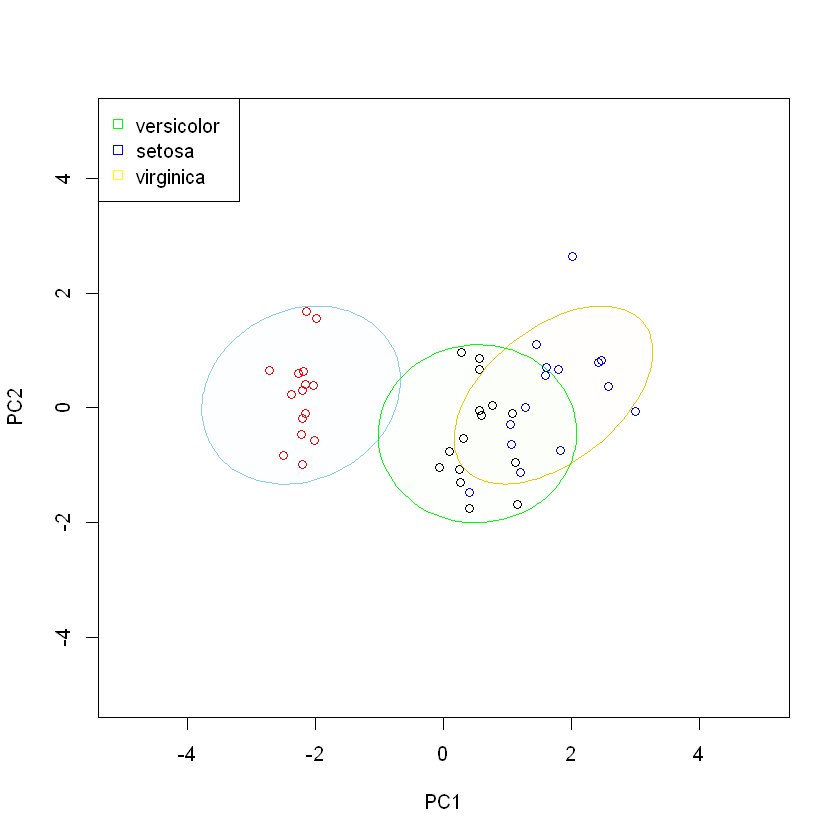

In [62]:
col_choice <- rep("black", length(pca_score_train[,1]))
id_set <- which(pca_df_test$y_test_iris_df == "setosa")
id_vir <- which(pca_df_test$y_test_iris_df == "virginica")
id_ver <- which(pca_df_test$y_test_iris_df == "versicolor")

col_choice[id_set] <- "red"
col_choice[id_vir] <- "blue"

plot(pca_score_test, xlim = c(-5, 5), ylim = c(-5,5), col = col_choice)

polygon(ellipse(x=cor(pca_df_test[id_set,1],pca_df_test[id_set,2]), centre=colMeans(pca_score_test[id_set,1:2]), level=0.70), col=adjustcolor("skyblue2", alpha.f=0.01), border="skyblue")
polygon(ellipse(x=cor(pca_df_test[id_vir,1],pca_df_test[id_vir,2]), centre=colMeans(pca_score_test[id_vir,1:2]), level=0.70), col=adjustcolor("gold2", alpha.f=0.01), border="gold2")
polygon(ellipse(x=cor(pca_df_test[id_ver,1],pca_df_test[id_ver,2]), centre=colMeans(pca_score_test[id_ver,1:2]), level=0.70), col=adjustcolor("green2", alpha.f=0.01), border="green")



# text(pca_score_train, col = col_choice, labels = 1:length(pima[,1]))
legend("topleft", c("versicolor", "setosa","virginica"), pch = .5, col = c("green", "blue","yellow"))

#### KNN with PCA (first two components)

In [366]:
MSE_PCA_train <- c()
MSE_PCA_test <- c()

for (i in 1:length(neighbors))
{
    knn_predict_train <- knn(train = as.matrix(pca_df_train[,1:2]), test = as.matrix(pca_df_train[,1:2]), cl = y_train_iris_df, k = neighbors[i])
    knn_predict_test <- knn(train = as.matrix(pca_df_train[,1:2]), test = as.matrix(pca_df_test[,1:2]), cl = y_train_iris_df, k = neighbors[i])
    MSE_PCA_train[i] <-mean(knn_predict_train != y_train_iris_df)
    MSE_PCA_test[i] <- mean(knn_predict_test != y_test_iris_df)
}



#### Plot training and testing errors


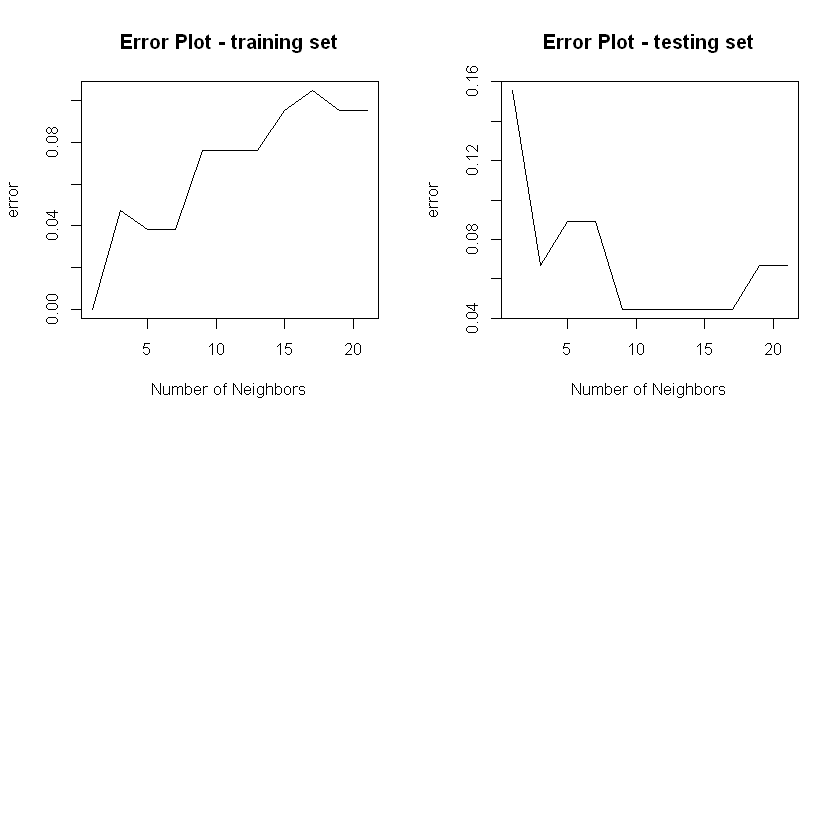

In [368]:
par(mfrow=c(2,2))

plot(neighbors,MSE_PCA_train,main = "Error Plot - training set",xlab = "Number of Neighbors",ylab="error",type="l")
plot(neighbors,MSE_PCA_test,main = "Error Plot - testing set",xlab = "Number of Neighbors",ylab="error",type="l")

In [369]:
MSE_PCA_test

[1] 0.15555556 0.06666667 0.08888889 0.08888889 0.04444444 0.04444444
 [7] 0.04444444 0.04444444 0.04444444 0.06666667 0.06666667

- as we can see from the graphs above:
    - for KNN after the application of PCA:
        - training set: the general trend is the same as KNN without PCA. smaller k generates smaller error, and as k increaes, the error increases as well. 
        - testing set: the error goes up and down, we can also see an down and then up trend (what we want to see from overfitting to underfitting). We see that the errors are the lowest from k = 9 - 17 (odd number). Since we chose 15 for our model without PCA, let's also choose 15 to be our k for our pca model for a even more accurate comparison!

In [387]:
knn_pca_pred_train<- knn(train = as.matrix(pca_df_train[,1:2]), test = as.matrix(pca_df_train[,1:2]), cl = y_train_iris_df, k = 15)


In [388]:
table(knn_pca_pred_train,y_train_iris_df)

                  y_train_iris_df
knn_pca_pred_train setosa versicolor virginica
        setosa         35          0         0
        versicolor      0         29         4
        virginica       0          6        31

In [389]:
train_pca_mse = mean(knn_pca_pred_train != y_train_iris_df)

cat("The training MSE is:",train_pca_mse)

The training MSE is: 0.0952381

In [390]:
knn_pca_pred_test<- knn(train = as.matrix(pca_df_train[,1:2]), test = as.matrix(pca_df_test[,1:2]), cl = y_train_iris_df, k = 15)


In [391]:
table(knn_pca_pred_test,y_test_iris_df)

                 y_test_iris_df
knn_pca_pred_test setosa versicolor virginica
       setosa         15          0         0
       versicolor      0         14         1
       virginica       0          1        14

In [392]:
test_pca_mse = mean(knn_pca_pred_test != y_test_iris_df)

cat("The training MSE is:",train_pca_mse)

The training MSE is: 0.0952381

In [394]:
rbind(train_mse,test_mse,train_pca_mse,test_pca_mse)

train_mse,0.08571429
test_mse,0.02222222
train_pca_mse,0.09523810
test_pca_mse,0.04444444


- we can see that chart from above that, the training error and testing erros are both lowest in KNN without PCA. It is also important to note that, we only have 4 variables in this dataset. The n to p ratio is 150:4, which is quite good and also it is a balanced dataset. In real life, you wouldn't really perform pca on a dataset like this, however we saw that, pca did produce slightly worse result (although won't always be the case, but almost definitely in a high p data, or p>>n), it still gave us realtively low testing error rate (technically only two missifications), as compared to without PCA which had only 1)